# __Modelo de Iluminación__

### __Computación Gráfica__

## Por: Juan Esteban Puyo Cubillos
---

## __CONTENIDO__

> - Modelo de iluminación
- Algoritmos de superficies visibles


# __ALGORITMOS PARA LA DETECCIÓN DE SUPERFICIES VISIBLES__

> Dependiendo del punto de vista de la cámara algunas superficies serán visibles y otras no. Utilizando el sistema de visualización de la cámara las superficies se ordenan en el eje Z, de esta forma se sabe cuales son las superficies que están adelante. Al momento de pintar un punto de la pantalla, este se proyecta por las diferentes superficies que atravisa y se queda con la más cercana. 
- Cuando se tienen superficies como mallas de triángulos, cada triángulo es una área que está contenida dentro de un plano. El vector normal del plano es $N = (A,B,C)$ y la eacuación del plano correspondiente es $Ax + By + Cz + D = 0$. De tal forma que el valor de $z$ para un valor de $(x, y)$ dado es: $$z = -\frac{Ax + By + D}{C}$$

- La idea es obtener el valor $z$ de la superficie para el punto en la pantalla. De hecho el siguiente valor de $z$ en la posición $(x+1, y)$ es una constante: $$z' = z-\frac{A}{C}$$

- Si la posición del punto es abajo $(x, y-1)$, y el punto atraviesa la misma superficie, entonces el nuevo $z$ es:
$$z' = z+\frac{B}{C}$$

## Plano y normal de un triángulo

> - Vector Normal: para hallar el vector normal se toma un vértice y se forman dos vectores con los otros dos. Se hace el producto cruz este los vectores y se obtiene el vector normal.
$$u = (x_2-x_1, y_2-y_1, z_2-z_1)$$
$$v = (x_3-x_1, y_3-y_1, z_3-z_1)$$
- El producto cruz entre estos dos vectores es $N = [\hat{i},\hat{j},\hat{k}]$:
$$\hat{i} = u_y v_z - u_z v_y$$
$$\hat{j} = u_z v_x - u_x v_z$$
$$\hat{k} = u_x v_y - u_y v_x$$

> - La ecuación del plano $Ax+By+Cz+D=0$ que contiene al triángulo se calcula a partir de un vértice $(x, y, z)$ y el vector normal $(A,B,C)$. El vector normal tiene los 3 primeros coeficientes del plano, el que hace falta se calcula como:
$$ D = -(Ax+By+Cz)$$



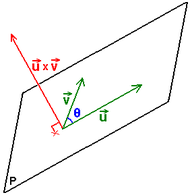

## Detección de caras posteriores

> - Para renderizar las gráficas se tiene en cuenta si la cara es frontal o posterior. Opcionalmente, para mejorar el desempeño las caras posteriores no se pintan. 
- Para detectar rápidamente las caras posteriores, solo se verifica la dirección del vector normal de la superficie. $V_{view}\cdot N > 0$
- Como el vector de la cámara $V_{view}$ está en la dirección de $-z_v$ entonces solo basta comprobar que el componente $C < 0$ de la normal sea menor a cero.

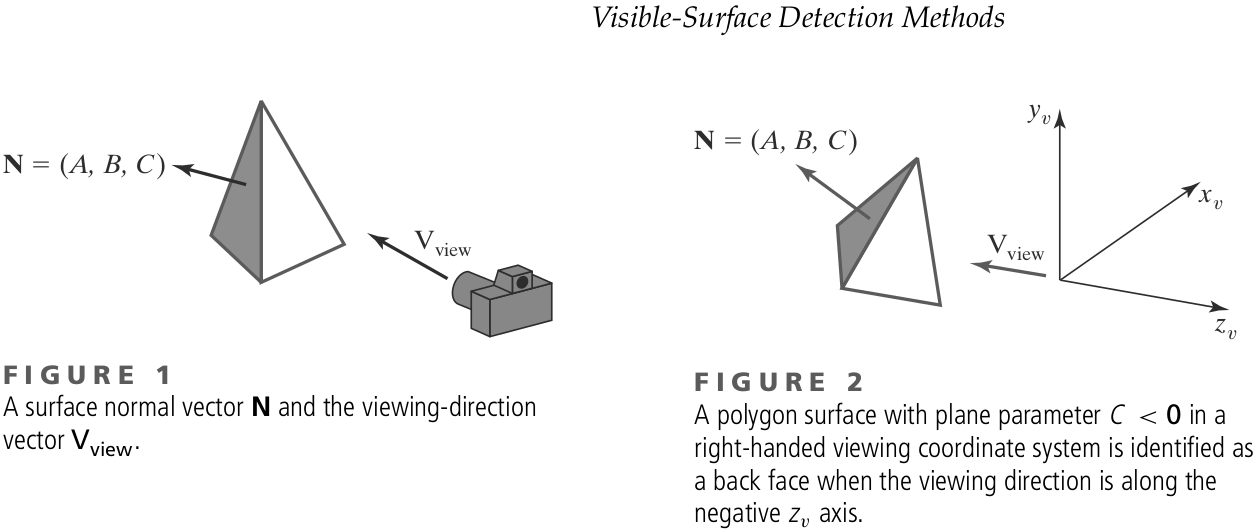

## __Algoritmo del buffer z__

> - El algoritmo de $z-$buffer permite generar el color de cada pixel de acuerdo con la superficie visible a la cámara. 
- Es un algoritmo que opera en el espacio de la imagen
- Se asume que todas las superficies son opacas
- La complejidad del algoritmo está dada por la cantidad de pixeles de la pantalla multiplicado por la cantidad de objetos. 
- Se requieren dos buffer uno para el color de los objetos y otro para almacenar los valores de profundidad
- El algoritmo trabaja en el sistema de coordenadas de visualización de la cámara normalizado

## Algoritmo

> - Inicaliza buffer de profundidad al valor máximo (`d(i,j) = 1`)
- Inicializa buffer de color igual al color de fondo (`c(i,j) = bg`)
- Para cada pixel $(x, y)$ de la pantalla haga:
    - Para cada triángulo de la escena
        - $z = -(Ax+By+D)/C$
        - Si $(x, y)$ está en el triángulo y si `z < d(i,j)`
            - `d(i,j) = z`
            - `c(i,j) = color`


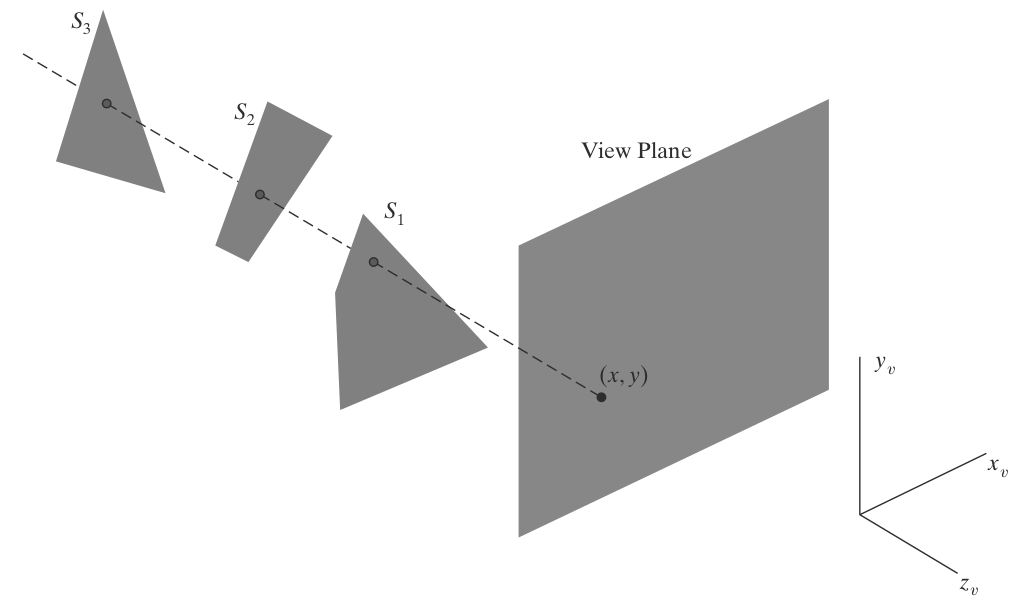

# __Detectar punto al interior de un triángulo__

> - Medir la orientación de un triángulo
- Medir la orientación de los triángulos que forma el punto con los tres vértices
- Si todos los triángulos formados con el punto a evaluar guardan la misma orientación es interior de lo contrario es exterior


In [ ]:
def test_point(a, b, c, p):
    c0 = (a[0]-c[0])*(b[1]-c[1])-(a[1]-c[1])*(b[0]-c[0]) #ABC
    c1 = (a[0]-p[0])*(b[1]-p[1])-(a[1]-p[1])*(b[0]-p[0]) #ABP
    c2 = (b[0]-p[0])*(c[1]-p[1])-(b[1]-p[1])*(c[0]-p[0]) #BCP
    c3 = (c[0]-p[0])*(a[1]-p[1])-(c[1]-p[1])*(a[0]-p[0]) #CAP
    print(c0, c1, c2, c3)
    if c0*c1>=0 and c0*c2>=0 and c0*c3>=0:
        return True
    return False

test_point([1,1], [4,3], [5,0], [3,2])


-11 -1 -4 -6


True

# __Algoritmo del buffer A__

> - Es una extensión del método $z-$buffer
- Permite hacer operaciones de mazcla de colores para superficies semi-trasparentes y para operaciones de anti-aliasing
- Se calcula el buffer de profundidad y para el color se almacena en una lista características asociados a el color y el material. Por ejemplo: 
    - color de la superficie RGB
    - Valor de trasparencia (Alpha)
    - porcentaje de cobertura de área
- En cada punto, para cada superficie que atraviesa, se ordena la lista por el valor de profundidad y se calcula la mezcla de color

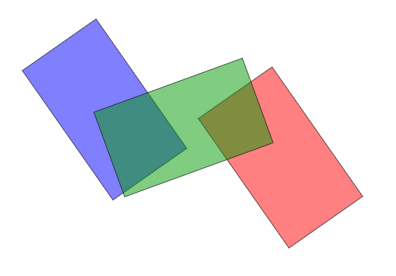

# __Modelo de iluminación__

> - Los modelo de iluminación consta de tres componentes:
    - Iluminación ambiental
    - Reflexión difusa
    - Reflexión especular
- Las fuentes de luz proveen una energia modelada por el parametro $I$, el cual puede estar compuesto de varios canales, por ejemplo RGB. El objetivo es calcular la luz que refleja cada una de las superficies que conforman la escena. 

## __Iluminación ambiental__
> - La intensidad reflejada $I_{amb}$ de cualquier punto de la superficie es:
$$i_{amb} = K_a I_a$$
- $K_a$ es un coeficiente de reflexión de luz ambiental que posee el material.
- $I_a$ intensidad de luz ambiental 

## __Reflexión difusa__

> - La instensidad de luz reflejada por la superficie $I_{diff}$ depende del ángulo de inclinación en el punto respecto a la fuente luz. $$I_{diff} = K_d I_p \cos(\theta) = K_d I_p (N\cdot L) $$
- $K_p$: es un coeficiente de reflexión de la luz difusa que posee el material.
- $I_p$: intensidad de la fuente de luz 
- $N$: Vector normal de la superficie en el punto
- $L$: Vector de dirección de la luz desde el punto $$L = \frac{P_{source}-P_{surf}}{|P_{source}-P_{surf}|}$$

## __Reflexión especular__

> - La reflexión directa de la luz en una superficie sobre el observador se conoce como reflexión especular. El modelo empírico de Phong provee una formula para calcular el efecto de la reflexión especular $I_{spec}$, el cual depende de las propiedades del material como el coeficiente $W(\theta) \approx K_s$
$$I_{spec} = K_s I_p (V\cdot R)^{n_s}$$
- Aquí $R$ es el vector de reflexión de la luz en el punto, como muestra la figura. Y se calcula como:
$$R + L =  (2N\cdot L) N$$
$$R =  (2N\cdot L) N - L$$



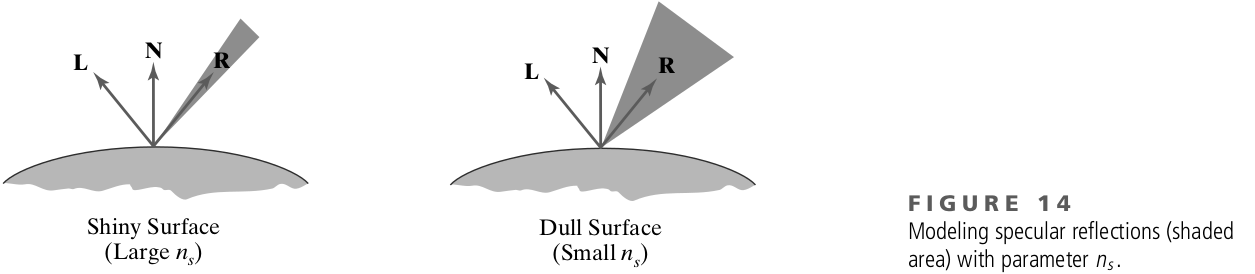

> - Para hacer más eficiente el cálculo se utiliza un vector medio entre $L$ y $V$ llamado $H$, en donde $(N \cdot H)$ reemplaza al producto punto entre $(V\cdot R)$. $$H = \frac{L+V}{|L+V|}$$
> - Al final el cálculo queda como: $$I_{spec} = K_s I_p (N\cdot H)^{n_s}$$
> - $K_s$: Coeficiente de reflexión especular
- $n_s$: parámetro que modela el brillo de la superficie. Es el ángulo de observación $\phi$ del reflejo de la luz por parte de la cámara


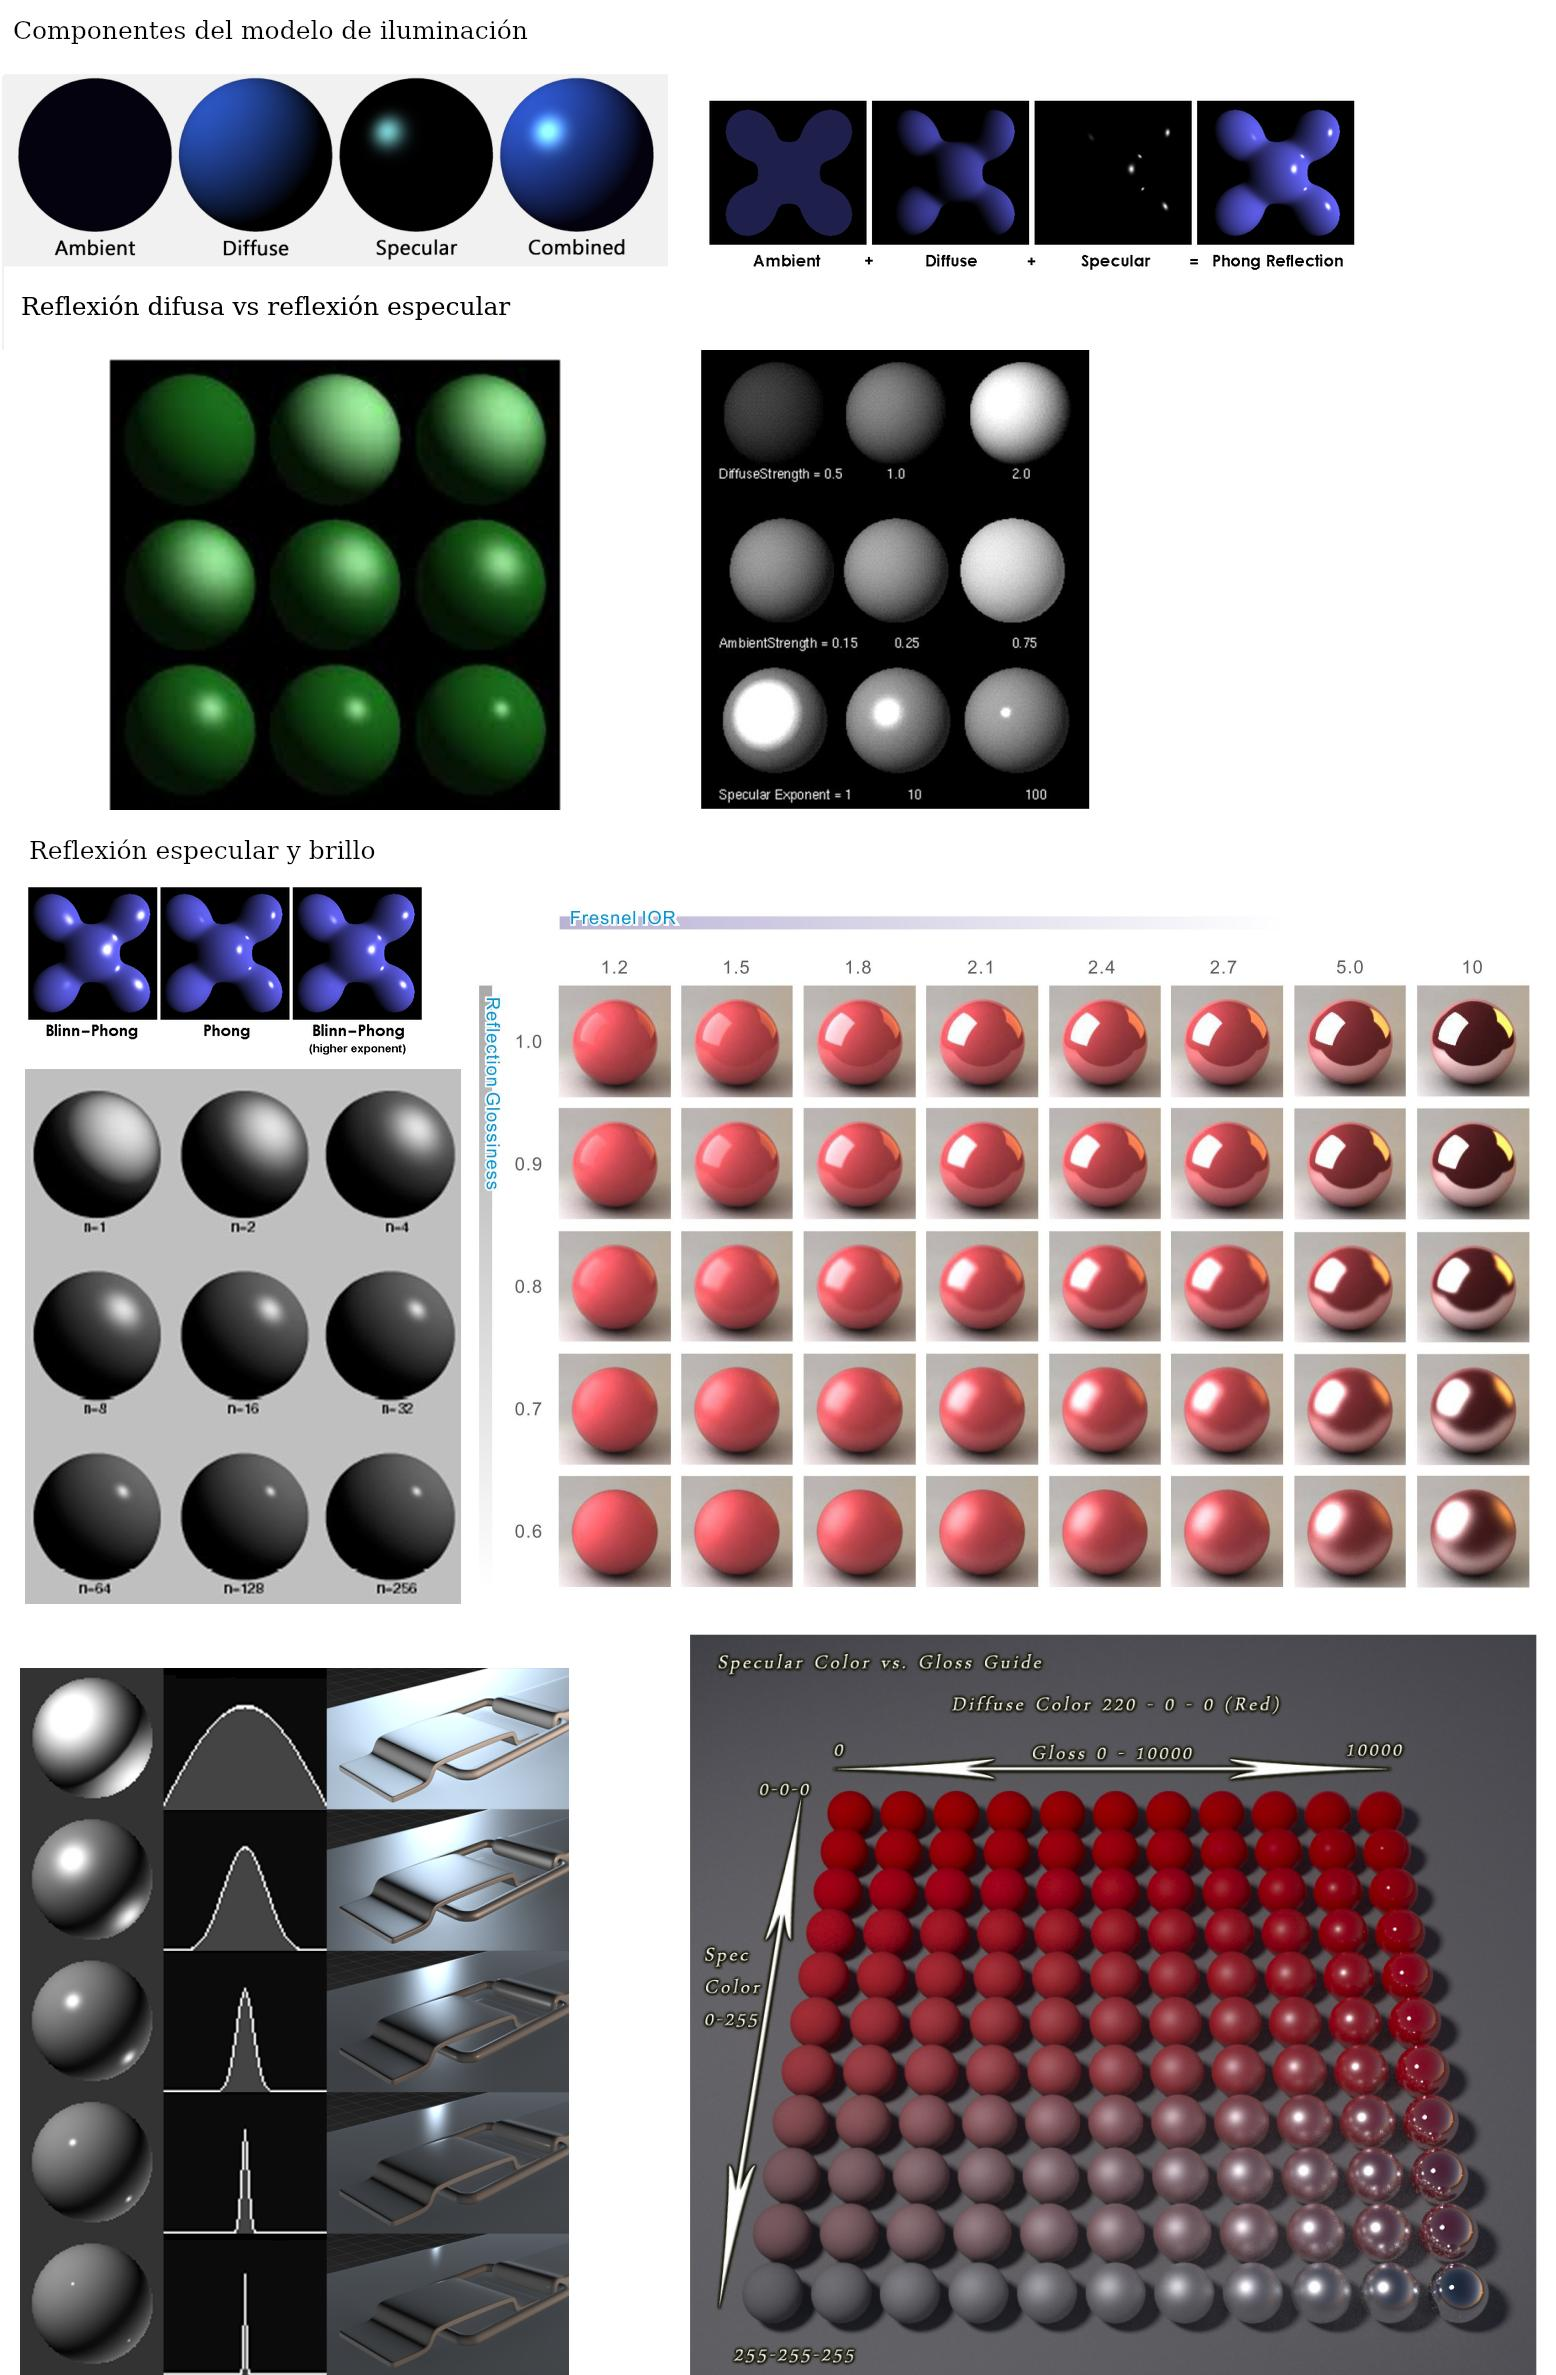

# Modelo de iluminación

> - Al final el modelo se iluminación sobre un punto de la escena está dado por:
$$I = K_a I_a + I_p (K_d (N\cdot L)+ K_s (N\cdot H)^{n_s})$$

---
> Al agregarle al modelo reflejos y sombras se obtienen resultados como las gráficas de abajo. 


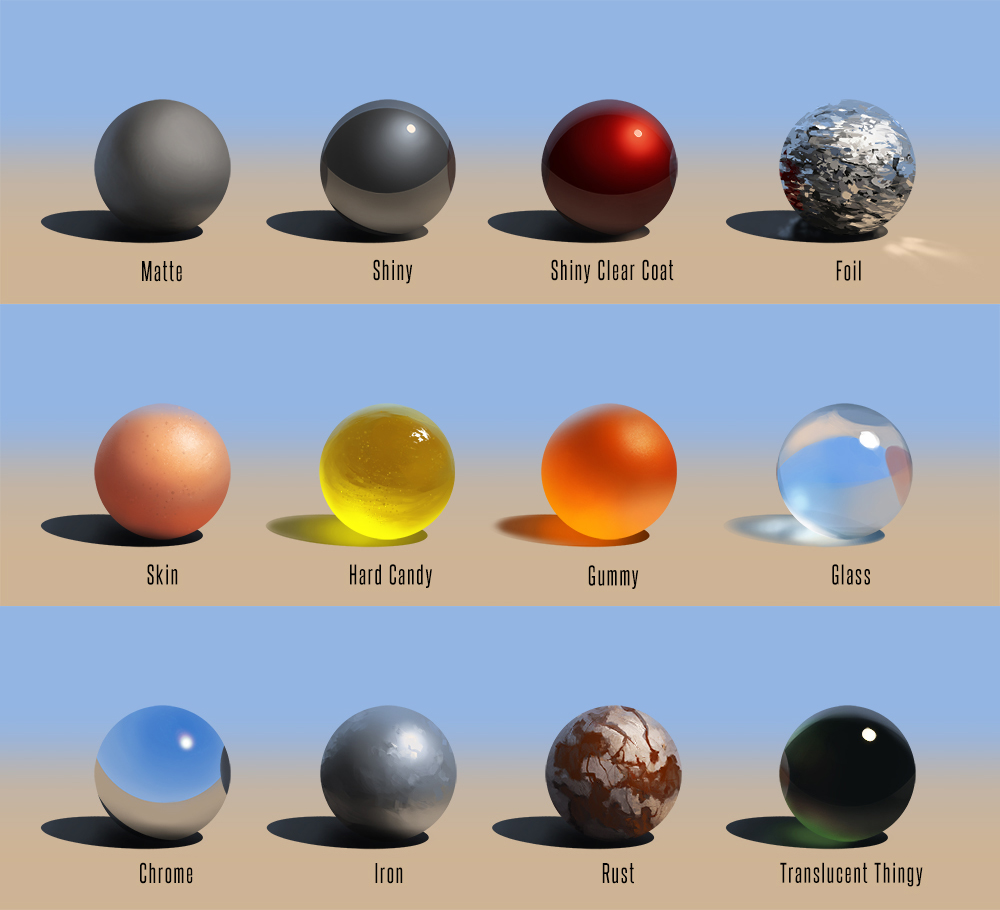

# Algoritmo del proyecto de iluminación

> - Inicializa profundidad `d(i, j) = máximo`
- Inicializa color `c(i, j) = backgound_color`
- Para todos los pixeles `(i, j)` de la pantalla haga:
    - Halla los valores de `(x, y)` en coordenadas de la cámara
    - Para cada triángulo del arreglo de índices haga:
        - Si `(x, y)` está dentro del triángulo y no es cara posterior, entonces:
            - `z = -(Ax+By+D)/C`, entonces:
            - Si `z < d(i,j)`
                - `d(i,j) = z`
                - `c(i,j) = color`
                - `N = [A, B, C]/mag(N)`
                - `L = [lx-x, ly-y, lz-z]/mag(L)`
                - `V = [vx-x, vy-y, vz-z]/mag(V)`
                - `H = (L+V)/2/mag(H)`
                - `I = Ka*Ia + Ip*(Kd dot(N,L)+ Ks*dot(N,H)**(ns))`
                - `c(i,j) = color*I`

---

> - Los valores de A, B, C, D dependen del triángulo
- Los valores de Ia, Ip dependen de la fuente de luz
- Los valores de Ka, Kd, Ks, ns dependen del material de cada superficie
- La posición de la luz está dada por: (lx, ly, lz)
- La posición de la cámara está dada por: (vx, vy, vz)
- Para modelar los parámetros de color, propiedades del material es necesario tener un arreglo de valores por cada triángulo.



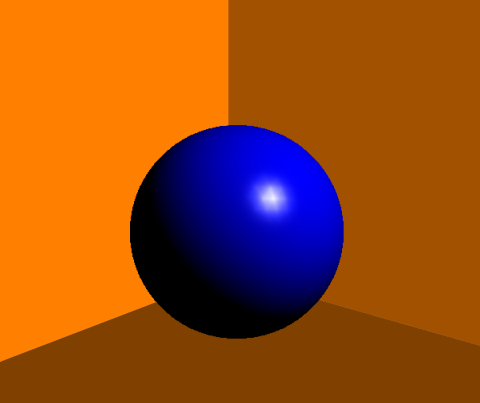